In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
import scipy.stats as stats
from sklearn.metrics import classification_report , accuracy_score , recall_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [52]:
df=pd.read_csv("data/train.csv");

C:\Users\Pragyan Kumar\AppData\Local\Temp\ipykernel_19040\3787797557.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("data/train.csv");


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [54]:
df.shape

(100000, 28)

In [55]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [56]:
df.isnull().sum()/len(df)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          0.000
Occupation                   0.000
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       7.002
Changed_Credit_Limit         0.000
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            0.000
Monthly_Balance              1.200
Credit_Score                 0.000
dtype: float64

In [57]:
dfnew=df.dropna()
dfnew

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good
10,0x1610,CUS_0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84_,3037.986667,2,...,_,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,High_spent_Large_value_payments,466.46647639764313,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,0x25fe8,CUS_0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,High_spent_Medium_value_payments,410.256158,Poor
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [58]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53049 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        53049 non-null  object 
 1   Customer_ID               53049 non-null  object 
 2   Month                     53049 non-null  object 
 3   Name                      53049 non-null  object 
 4   Age                       53049 non-null  object 
 5   SSN                       53049 non-null  object 
 6   Occupation                53049 non-null  object 
 7   Annual_Income             53049 non-null  object 
 8   Monthly_Inhand_Salary     53049 non-null  float64
 9   Num_Bank_Accounts         53049 non-null  int64  
 10  Num_Credit_Card           53049 non-null  int64  
 11  Interest_Rate             53049 non-null  int64  
 12  Num_of_Loan               53049 non-null  object 
 13  Type_of_Loan              53049 non-null  object 
 14  Delay_from_

In [59]:
data_lost=(len(df)-len(dfnew))*100/len(df)
f"Data Lost-{data_lost:0.2f} %"

'Data Lost-46.95 %'

In [60]:

df.drop("Name",axis=1,inplace=True)

In [61]:
df.head()

,ID,Customer_ID,Month,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Age                       100000 non-null  object 
 4   SSN                       100000 non-null  object 
 5   Occupation                100000 non-null  object 
 6   Annual_Income             100000 non-null  object 
 7   Monthly_Inhand_Salary     84998 non-null   float64
 8   Num_Bank_Accounts         100000 non-null  int64  
 9   Num_Credit_Card           100000 non-null  int64  
 10  Interest_Rate             100000 non-null  int64  
 11  Num_of_Loan               100000 non-null  object 
 12  Type_of_Loan              88592 non-null   object 
 13  Delay_from_due_date       100000 non-null  in

In [63]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [64]:
df["Credit_Score"]

0            Good
1            Good
2            Good
3            Good
4            Good
           ...   
99995        Poor
99996        Poor
99997        Poor
99998    Standard
99999        Poor
Name: Credit_Score, Length: 100000, dtype: object

In [65]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df["credit__score_label"]=lb.fit_transform(df["Credit_Score"])

In [66]:
df.drop("Credit_Score",axis=1,inplace=True)

In [67]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'credit__score_label'],
      dtype='object')

In [68]:
drop_df = df.drop(['ID','Customer_ID','Month','SSN','Num_Bank_Accounts','Num_Credit_Card',
         'Interest_Rate','Num_of_Loan','Type_of_Loan','Changed_Credit_Limit','Amount_invested_monthly'], axis=1).copy()
drop_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label
0,23,Scientist,19114.12,1824.843333,3,7,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,0
1,23,Scientist,19114.12,NaN,-1,NaN,4.0,Good,809.98,31.944960,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,0
2,-500,Scientist,19114.12,NaN,3,7,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,0
3,23,Scientist,19114.12,NaN,5,4,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,0
4,23,Scientist,19114.12,1824.843333,6,NaN,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,Mechanic,39628.99,3359.415833,23,7,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,1
99996,25,Mechanic,39628.99,3359.415833,18,7,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,1
99997,25,Mechanic,39628.99,3359.415833,27,6,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,1
99998,25,Mechanic,39628.99,3359.415833,20,NaN,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,2


In [69]:
drop_df["Age"]

0          23
1          23
2        -500
3          23
4          23
         ... 
99995      25
99996      25
99997      25
99998      25
99999      25
Name: Age, Length: 100000, dtype: object

In [70]:
def filter_col(value):
    if '-' in value:
        return value.split('-')[1]
    elif '_' in value:
        return value.split('_')[0]
    else:
        return value

In [71]:
type(df["Age"])

pandas.core.series.Series

In [72]:
drop_df["Age"] = drop_df["Age"].apply(filter_col)
drop_df["Age"] = drop_df["Age"].astype(int)


In [73]:
for i in range(len(drop_df["Age"])):
    if drop_df["Age"][i] > 90 or drop_df["Age"][i] < 10:
        drop_df["Age"][i] = np.nan
    else:
        drop_df["Age"][i] = drop_df["Age"][i]

C:\Users\Pragyan Kumar\AppData\Local\Temp\ipykernel_19040\2827531744.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  drop_df["Age"][i] = drop_df["Age"][i]
C:\Users\Pragyan Kumar\AppData\Local\Temp\ipykernel_19040\2827531744.py:5: Setting

In [74]:
drop_df["Age"]

0        23.0
1        23.0
2         NaN
3        23.0
4        23.0
         ... 
99995    25.0
99996    25.0
99997    25.0
99998    25.0
99999    25.0
Name: Age, Length: 100000, dtype: float64

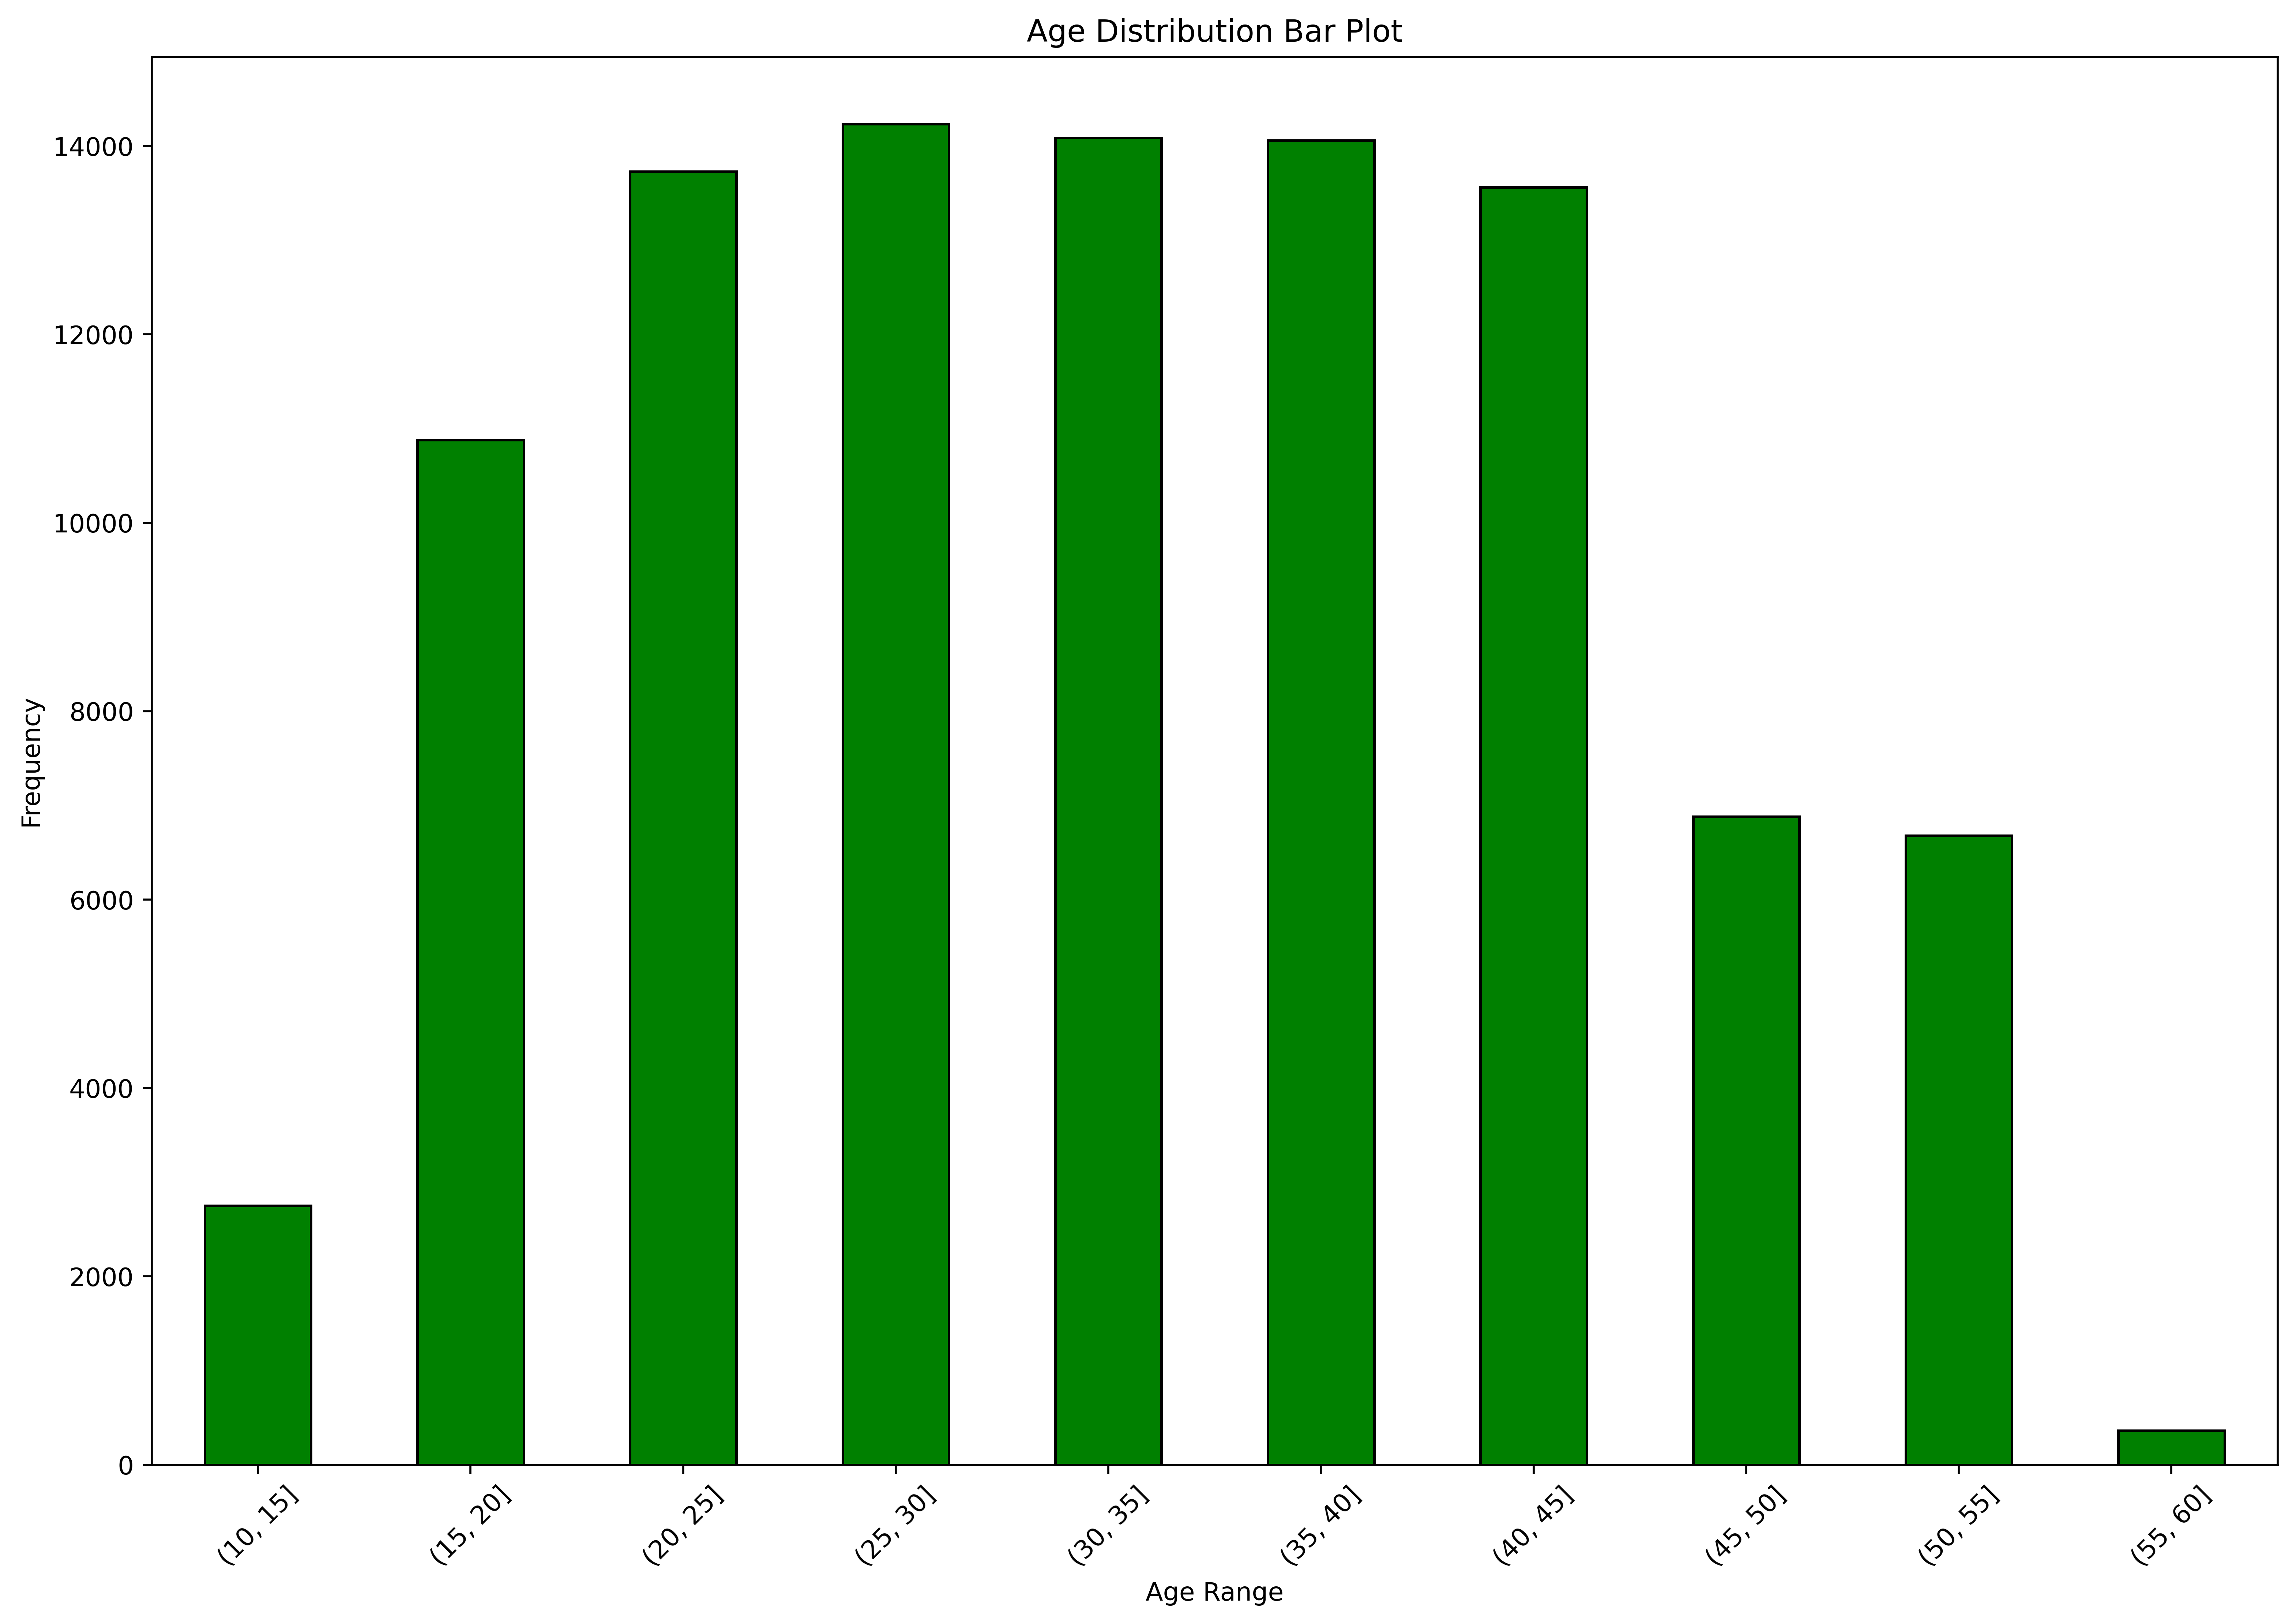

In [75]:
age_bins = range(10,65,5) 
plt.figure(figsize=(15,10),dpi=500)
delay_ranges = pd.cut(drop_df["Age"], bins=age_bins)
delay_counts = delay_ranges.value_counts().sort_index()
delay_counts.plot(kind='bar', color='green', edgecolor='black')

plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Age Distribution Bar Plot')
plt.xticks(rotation=45)  
plt.show()

In [76]:
drop_df["Occupation"].value_counts()

Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [77]:
drop_df["Occupation"].replace("_______",np.nan,inplace=True)

C:\Users\Pragyan Kumar\AppData\Local\Temp\ipykernel_19040\3539272844.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drop_df["Occupation"].replace("_______",np.nan,inplace=True)


In [78]:
drop_df["Occupation"]=drop_df["Occupation"].astype("object")

In [79]:
drop_df["Occupation"].value_counts()

Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [80]:
drop_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label
0,23.0,Scientist,19114.12,1824.843333,3,7,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,High_spent_Small_value_payments,312.49408867943663,0
1,23.0,Scientist,19114.12,NaN,-1,NaN,4.0,Good,809.98,31.944960,NaN,No,49.574949,Low_spent_Large_value_payments,284.62916249607184,0
2,NaN,Scientist,19114.12,NaN,3,7,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,Low_spent_Medium_value_payments,331.2098628537912,0
3,23.0,Scientist,19114.12,NaN,5,4,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,Low_spent_Small_value_payments,223.45130972736786,0
4,23.0,Scientist,19114.12,1824.843333,6,NaN,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,High_spent_Medium_value_payments,341.48923103222177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,23,7,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,High_spent_Large_value_payments,479.866228,1
99996,25.0,Mechanic,39628.99,3359.415833,18,7,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,High_spent_Medium_value_payments,496.65161,1
99997,25.0,Mechanic,39628.99,3359.415833,27,6,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,High_spent_Large_value_payments,516.809083,1
99998,25.0,Mechanic,39628.99,3359.415833,20,NaN,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,Low_spent_Large_value_payments,319.164979,2


In [81]:
krna=['Age', 'Occupation', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries']

In [82]:
drop_df["Delay_from_due_date"].value_counts().sort_index()

Delay_from_due_date
-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: count, Length: 73, dtype: int64

In [83]:
drop_df["Delay_from_due_date"].isnull().sum()

0

In [84]:
drop_df["Delay_from_due_date"] = drop_df["Delay_from_due_date"].apply(lambda x: max(x, 0))


In [85]:
drop_df["Num_of_Delayed_Payment"].isnull().sum()

7002

In [86]:
def filter_(value:str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value
drop_df["Num_of_Delayed_Payment"]= drop_df["Num_of_Delayed_Payment"].apply(filter_)

In [87]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       97219 non-null   float64
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  object 
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_of_Delayed_Payment    92998 non-null   object 
 6   Num_Credit_Inquiries      98035 non-null   float64
 7   Credit_Mix                100000 non-null  object 
 8   Outstanding_Debt          100000 non-null  object 
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Credit_History_Age        90970 non-null   object 
 11  Payment_of_Min_Amount     100000 non-null  object 
 12  Total_EMI_per_month       100000 non-null  float64
 13  Payment_Behaviour         100000 non-null  ob

In [88]:
drop_df["Num_Credit_Inquiries"].isnull().sum()

1965

In [89]:
drop_df["Annual_Income"].value_counts()

Annual_Income
36585.12     16
20867.67     16
17273.83     16
9141.63      15
33029.66     15
             ..
20269.93_     1
15157.25_     1
44955.64_     1
76650.12_     1
4262933.0     1
Name: count, Length: 18940, dtype: int64

In [90]:
drop_df["Annual_Income"] = drop_df["Annual_Income"].apply(filter_col)
drop_df["Annual_Income"] = drop_df["Annual_Income"].astype(float)

In [91]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       97219 non-null   float64
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_of_Delayed_Payment    92998 non-null   object 
 6   Num_Credit_Inquiries      98035 non-null   float64
 7   Credit_Mix                100000 non-null  object 
 8   Outstanding_Debt          100000 non-null  object 
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Credit_History_Age        90970 non-null   object 
 11  Payment_of_Min_Amount     100000 non-null  object 
 12  Total_EMI_per_month       100000 non-null  float64
 13  Payment_Behaviour         100000 non-null  ob

In [92]:
krna=[ 'Occupation', 
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
        
        
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
      'Total_EMI_per_month', 

      
      'Payment_Behaviour', 'Monthly_Balance']

In [93]:
drop_df["Monthly_Balance"].isnull().sum()

1200

In [94]:
drop_df["Monthly_Balance"].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
312.49408867943663                  1
415.32532309844316                  1
252.08489793906085                  1
254.9709216273975                   1
                                   ..
366.2890379762706                   1
151.1882696261166                   1
306.75027851710234                  1
278.8720257394474                   1
393.673696                          1
Name: count, Length: 98792, dtype: int64

In [95]:
drop_df['Monthly_Balance']=drop_df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)
drop_df['Monthly_Balance']=drop_df['Monthly_Balance'].astype("float")

In [96]:
drop_df["Monthly_Balance"].isnull().sum()

1209

In [97]:
years  = []
months = []
for value in drop_df["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
drop_df['Credit_Age_years'] = pd.Series(years)
drop_df['Credit_Age_months'] = pd.Series(months) 
drop_df.drop('Credit_History_Age',axis=1,inplace=True)

In [98]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       97219 non-null   float64
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_of_Delayed_Payment    92998 non-null   object 
 6   Num_Credit_Inquiries      98035 non-null   float64
 7   Credit_Mix                100000 non-null  object 
 8   Outstanding_Debt          100000 non-null  object 
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Payment_of_Min_Amount     100000 non-null  object 
 11  Total_EMI_per_month       100000 non-null  float64
 12  Payment_Behaviour         100000 non-null  object 
 13  Monthly_Balance           98791 non-null   fl

In [99]:
drop_df["Credit_Mix"].value_counts()

Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64

In [100]:
drop_df['Credit_Mix']=drop_df['Credit_Mix'].replace('_',np.nan)


In [101]:

lc=LabelEncoder()
drop_df["Credit_Mix"]=lc.fit_transform(drop_df["Credit_Mix"])

In [102]:
drop_df["Credit_Mix"].value_counts()

Credit_Mix
2    36479
1    24337
3    20195
0    18989
Name: count, dtype: int64

In [103]:
drop_df["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64

In [104]:
drop_df["Payment_Behaviour"]=drop_df["Payment_Behaviour"].replace("!@9#%8",np.nan)

In [105]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
drop_df["Payment_Behaviour"]=l.fit_transform(drop_df["Payment_Behaviour"])

In [106]:
drop_df["Payment_Behaviour"].ffill(inplace=True)

C:\Users\Pragyan Kumar\AppData\Local\Temp\ipykernel_19040\3855901093.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drop_df["Payment_Behaviour"].ffill(inplace=True)


In [107]:
drop_df["Payment_Behaviour"]=drop_df["Payment_Behaviour"].astype("int64")

In [108]:
drop_df["Outstanding_Debt"].isna().sum()

0

In [109]:
drop_df["Outstanding_Debt"].value_counts()

Outstanding_Debt
1360.45     24
460.46      23
1151.7      23
1109.03     23
467.7       16
            ..
245.46_      1
645.77_      1
174.79_      1
1181.13_     1
1013.53_     1
Name: count, Length: 13178, dtype: int64

In [110]:
drop_df["Outstanding_Debt"] = drop_df["Outstanding_Debt"].apply(filter_col)
drop_df["Outstanding_Debt"] = drop_df["Outstanding_Debt"].astype(float)

In [111]:
drop_df["Outstanding_Debt"].value_counts()

Outstanding_Debt
1109.03    24
1151.70    24
1360.45    24
460.46     24
1058.13    16
           ..
4230.04     8
641.99      8
98.61       8
2614.48     8
502.38      8
Name: count, Length: 12203, dtype: int64

In [112]:
drop_df["Num_Credit_Inquiries"].value_counts()

Num_Credit_Inquiries
4.0       11271
3.0        8890
6.0        8111
7.0        8058
2.0        8028
          ...  
1721.0        1
1750.0        1
2397.0        1
621.0         1
74.0          1
Name: count, Length: 1223, dtype: int64

In [113]:
(drop_df["Num_Credit_Inquiries"]<0).sum()

0

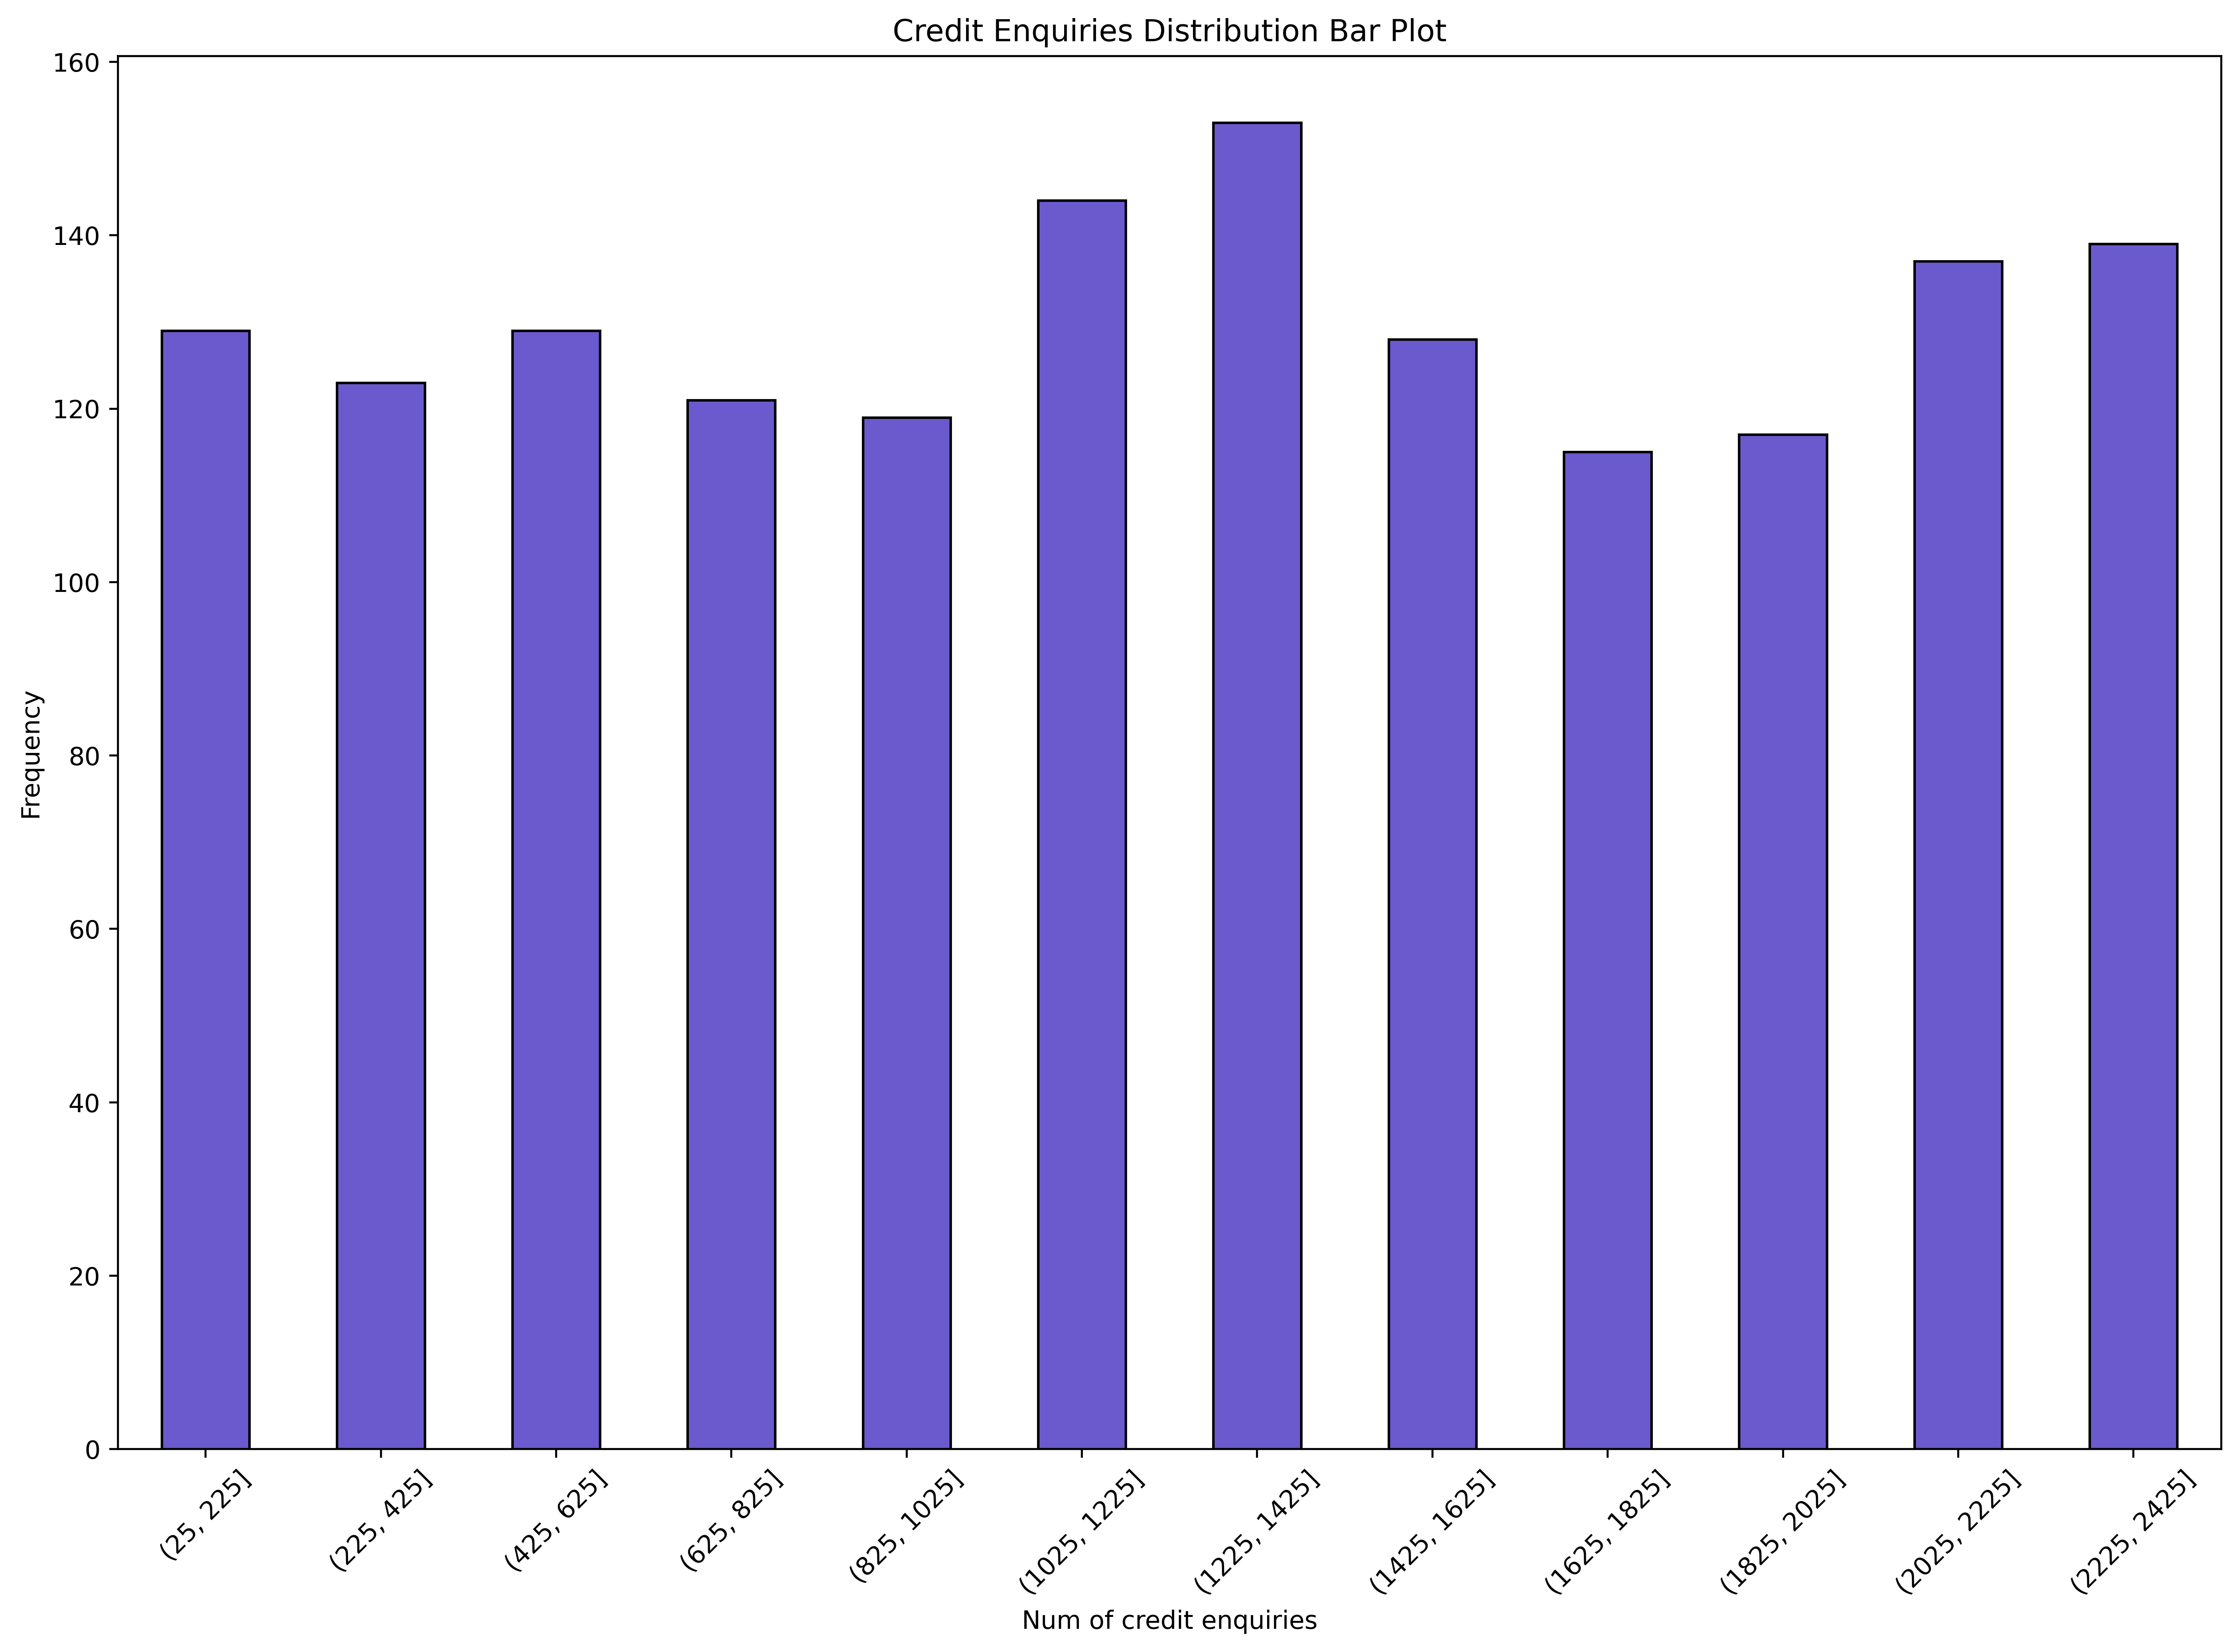

In [114]:
age_bins = range(25,2600,200)  
plt.figure(figsize=(15,10),dpi=500)
delay_ranges = pd.cut(drop_df["Num_Credit_Inquiries"], bins=age_bins)
delay_counts = delay_ranges.value_counts().sort_index()
delay_counts.plot(kind='bar', color='slateblue', edgecolor='black')
plt.xlabel('Num of credit enquiries')
plt.ylabel('Frequency')
plt.title('Credit Enquiries Distribution Bar Plot')
plt.xticks(rotation=45) 
plt.show()

In [115]:
drop_df["Credit_Utilization_Ratio"]=drop_df["Credit_Utilization_Ratio"].round(3)

In [116]:
drop_df["Total_EMI_per_month"]=drop_df["Total_EMI_per_month"].astype("float").round(3)

In [117]:
drop_df

,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,credit__score_label,Credit_Age_years,Credit_Age_months
0,23.0,Scientist,19114.12,1824.843333,3,7,4.0,3,809.98,26.823,No,49.575,2,312.494089,0,22.0,1.0
1,23.0,Scientist,19114.12,NaN,0,NaN,4.0,1,809.98,31.945,No,49.575,3,284.629162,0,NaN,NaN
2,NaN,Scientist,19114.12,NaN,3,7,4.0,1,809.98,28.609,No,49.575,4,331.209863,0,22.0,3.0
3,23.0,Scientist,19114.12,NaN,5,4,4.0,1,809.98,31.378,No,49.575,5,223.451310,0,22.0,4.0
4,23.0,Scientist,19114.12,1824.843333,6,NaN,4.0,1,809.98,24.797,No,49.575,1,341.489231,0,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,Mechanic,39628.99,3359.415833,23,7,3.0,3,502.38,34.664,No,35.104,0,479.866228,1,31.0,6.0
99996,25.0,Mechanic,39628.99,3359.415833,18,7,3.0,3,502.38,40.566,No,35.104,1,496.651610,1,31.0,7.0
99997,25.0,Mechanic,39628.99,3359.415833,27,6,3.0,1,502.38,41.256,No,35.104,0,516.809083,1,31.0,8.0
99998,25.0,Mechanic,39628.99,3359.415833,20,NaN,3.0,1,502.38,33.638,No,35.104,3,319.164979,2,31.0,9.0


In [118]:
drop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Age                       97219 non-null   float64
 1   Occupation                92938 non-null   object 
 2   Annual_Income             100000 non-null  float64
 3   Monthly_Inhand_Salary     84998 non-null   float64
 4   Delay_from_due_date       100000 non-null  int64  
 5   Num_of_Delayed_Payment    92998 non-null   object 
 6   Num_Credit_Inquiries      98035 non-null   float64
 7   Credit_Mix                100000 non-null  int32  
 8   Outstanding_Debt          100000 non-null  float64
 9   Credit_Utilization_Ratio  100000 non-null  float64
 10  Payment_of_Min_Amount     100000 non-null  object 
 11  Total_EMI_per_month       100000 non-null  float64
 12  Payment_Behaviour         100000 non-null  int64  
 13  Monthly_Balance           98791 non-null   fl

In [119]:
drop_df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
       'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Payment_Behaviour',
       'Monthly_Balance', 'credit__score_label', 'Credit_Age_years',
       'Credit_Age_months'],
      dtype='object')

In [120]:
drop_df.isnull().sum()

Age                          2781
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Payment_Behaviour               0
Monthly_Balance              1209
credit__score_label             0
Credit_Age_years             9030
Credit_Age_months            9030
dtype: int64

In [121]:
drop_df["Monthly_Inhand_Salary"].value_counts().head(20)     #to know why i use ffill


Monthly_Inhand_Salary
6769.130000     15
6358.956667     15
2295.058333     15
6082.187500     15
3080.555000     14
4387.272500     13
5766.491667     13
6639.560000     13
536.431250      12
1315.560833     11
2557.861667      9
1476.062917      8
2610.171667      8
9641.480000      8
11624.846667     8
1393.486667      8
1801.474167      8
7554.577500      8
1365.173333      8
1474.625417      8
Name: count, dtype: int64

In [122]:
drop_df.loc[drop_df["Monthly_Inhand_Salary"] ==1359.206250, "Occupation"] #to know why i use ffill


59144    Manager
59145    Manager
59146        NaN
59147    Manager
59148    Manager
59149    Manager
59150    Manager
59151    Manager
Name: Occupation, dtype: object

In [123]:
drop_df['Occupation'].ffill(inplace=True)


C:\Users\Pragyan Kumar\AppData\Local\Temp\ipykernel_19040\674179266.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drop_df['Occupation'].ffill(inplace=True)


In [124]:
drop_df["Monthly_Inhand_Salary"].value_counts().head(10)
drop_df.loc[drop_df["Monthly_Inhand_Salary"] ==1359.206250, "Occupation"] 
drop_df.drop('Monthly_Inhand_Salary',axis=1,inplace=True)



In [125]:
encoder = OneHotEncoder()
encoded_pay_min_amt= encoder.fit_transform(drop_df[["Payment_of_Min_Amount"]])
df_encoded = pd.DataFrame(encoded_pay_min_amt.toarray(), columns=encoder.get_feature_names_out(["Payment_of_Min_Amount"]))
combined_df = pd.concat([drop_df, df_encoded], axis=1)
combined_df.drop('Payment_of_Min_Amount',axis=1,inplace=True)

<Axes: >

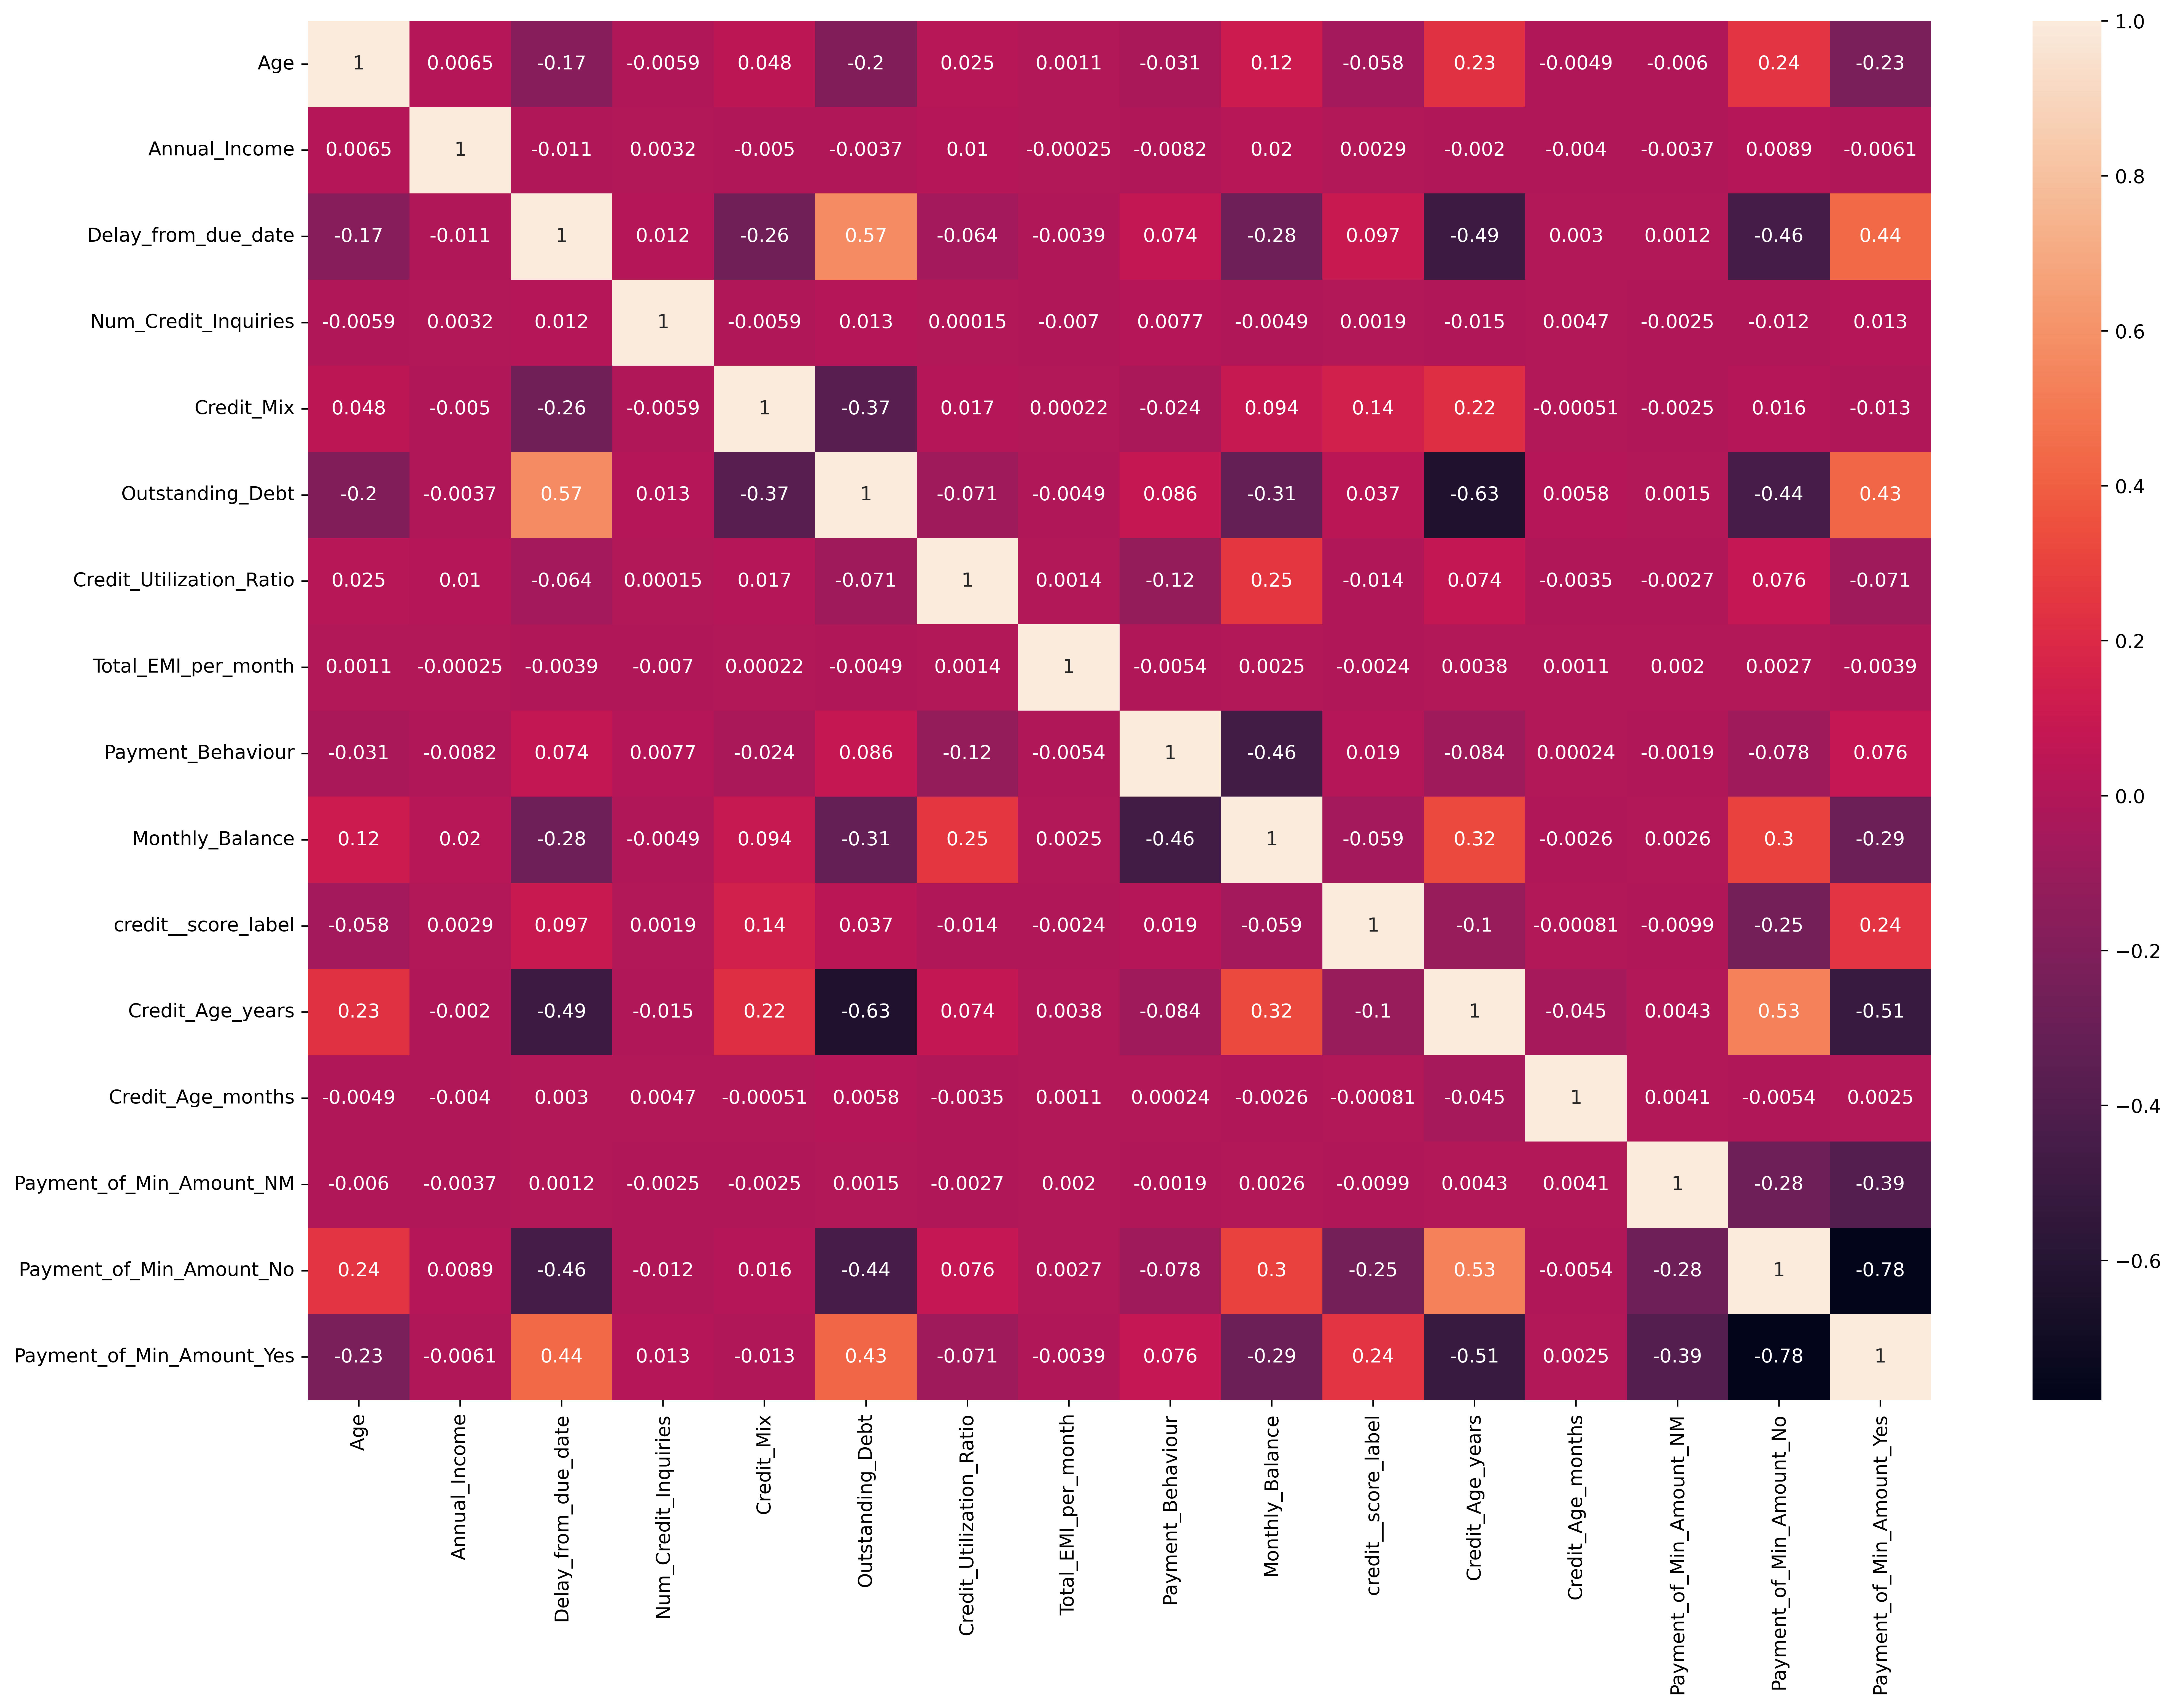

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = combined_df.select_dtypes(include=[float, int])
plt.figure(figsize=(19,13),dpi=500)
sns.heatmap(numeric_df.corr(), annot=True)

In [127]:
combined_df.columns

Index(['Age', 'Occupation', 'Annual_Income', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month',
       'Payment_Behaviour', 'Monthly_Balance', 'credit__score_label',
       'Credit_Age_years', 'Credit_Age_months', 'Payment_of_Min_Amount_NM',
       'Payment_of_Min_Amount_No', 'Payment_of_Min_Amount_Yes'],
      dtype='object')

In [128]:
combined_df['credit__score_label'] = combined_df.pop("credit__score_label")

In [129]:
combined_df.head()

,Age,Occupation,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Payment_Behaviour,Monthly_Balance,Credit_Age_years,Credit_Age_months,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,credit__score_label
0,23.0,Scientist,19114.12,3,7,4.0,3,809.98,26.823,49.575,2,312.494089,22.0,1.0,0.0,1.0,0.0,0
1,23.0,Scientist,19114.12,0,NaN,4.0,1,809.98,31.945,49.575,3,284.629162,NaN,NaN,0.0,1.0,0.0,0
2,NaN,Scientist,19114.12,3,7,4.0,1,809.98,28.609,49.575,4,331.209863,22.0,3.0,0.0,1.0,0.0,0
3,23.0,Scientist,19114.12,5,4,4.0,1,809.98,31.378,49.575,5,223.451310,22.0,4.0,0.0,1.0,0.0,0
4,23.0,Scientist,19114.12,6,NaN,4.0,1,809.98,24.797,49.575,1,341.489231,22.0,5.0,0.0,1.0,0.0,0


In [130]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        97219 non-null   float64
 1   Occupation                 100000 non-null  object 
 2   Annual_Income              100000 non-null  float64
 3   Delay_from_due_date        100000 non-null  int64  
 4   Num_of_Delayed_Payment     92998 non-null   object 
 5   Num_Credit_Inquiries       98035 non-null   float64
 6   Credit_Mix                 100000 non-null  int32  
 7   Outstanding_Debt           100000 non-null  float64
 8   Credit_Utilization_Ratio   100000 non-null  float64
 9   Total_EMI_per_month        100000 non-null  float64
 10  Payment_Behaviour          100000 non-null  int64  
 11  Monthly_Balance            98791 non-null   float64
 12  Credit_Age_years           90970 non-null   float64
 13  Credit_Age_months          909

<Axes: >

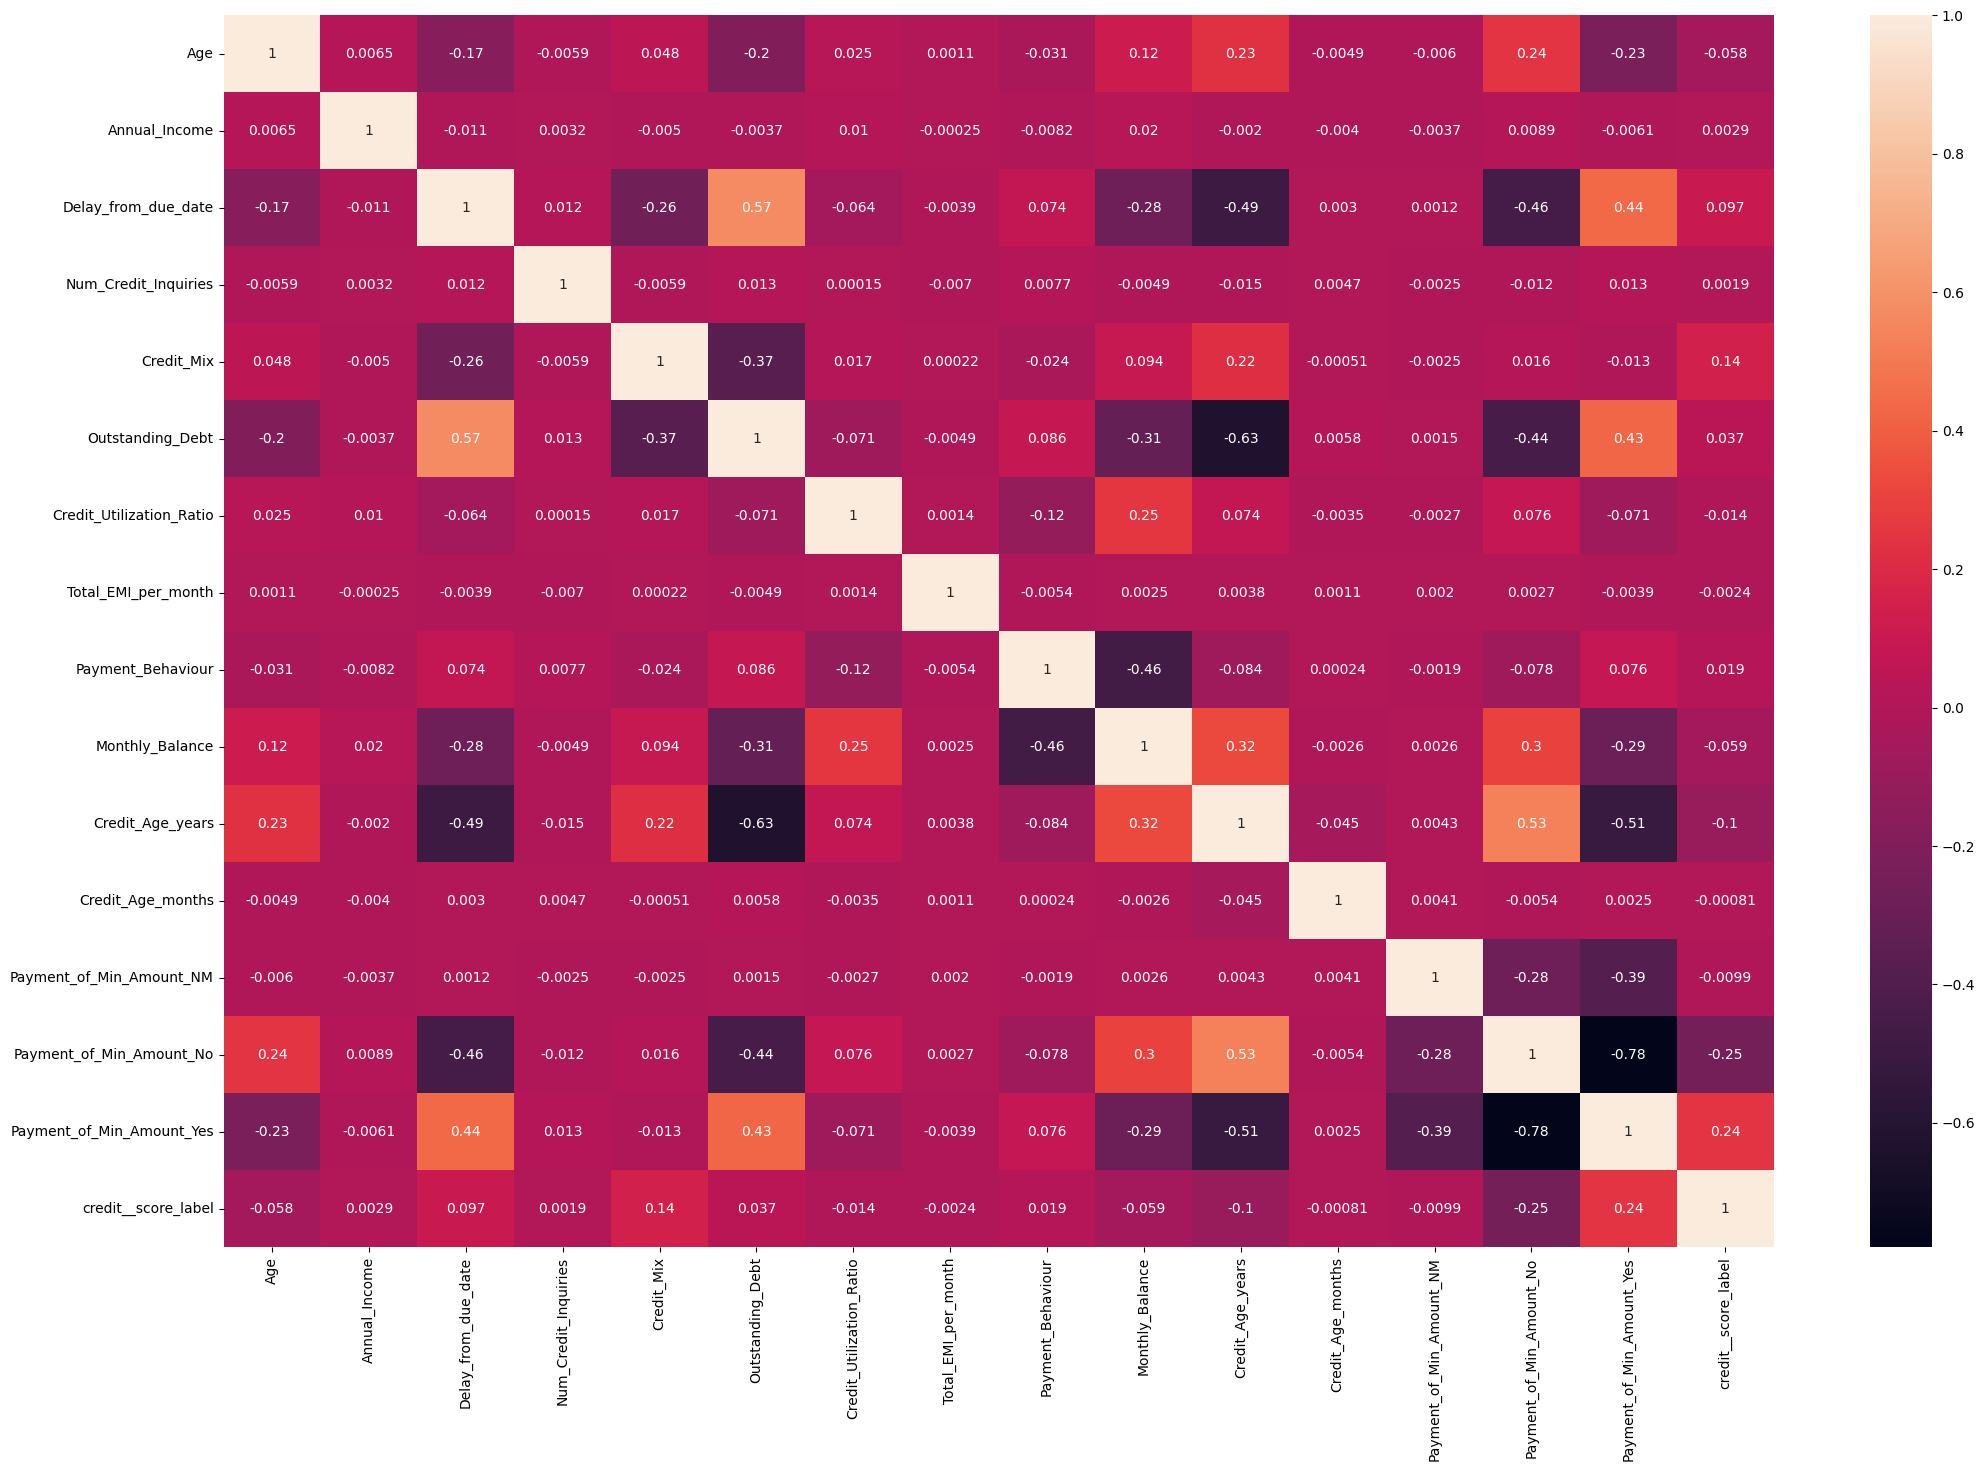

In [131]:
plt.figure(figsize=(25,16))
numeric_df = combined_df.select_dtypes(include=[float, int])
sns.heatmap(numeric_df.corr(), annot=True)

In [132]:
import pandas as pd
numeric_df = combined_df.select_dtypes(include=[float, int])
correlation_values = abs(numeric_df.corr()["credit__score_label"]).sort_values()
print("Sorted Correlation Values:")
print(correlation_values)


Sorted Correlation Values:
Credit_Age_months            0.000808
Num_Credit_Inquiries         0.001929
Total_EMI_per_month          0.002369
Annual_Income                0.002906
Payment_of_Min_Amount_NM     0.009854
Credit_Utilization_Ratio     0.014370
Payment_Behaviour            0.018793
Outstanding_Debt             0.037153
Age                          0.058464
Monthly_Balance              0.058651
Delay_from_due_date          0.097419
Credit_Age_years             0.102157
Credit_Mix                   0.144913
Payment_of_Min_Amount_Yes    0.243400
Payment_of_Min_Amount_No     0.247100
credit__score_label          1.000000
Name: credit__score_label, dtype: float64


In [133]:
combined_df.isnull().sum()

Age                          2781
Occupation                      0
Annual_Income                   0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Payment_Behaviour               0
Monthly_Balance              1209
Credit_Age_years             9030
Credit_Age_months            9030
Payment_of_Min_Amount_NM        0
Payment_of_Min_Amount_No        0
Payment_of_Min_Amount_Yes       0
credit__score_label             0
dtype: int64

In [134]:
numerical_data = []
object_data = []

for column in combined_df.columns:
    if combined_df.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)
imputer = KNNImputer(n_neighbors=5)
combined_df[numerical_data] = imputer.fit_transform(combined_df[numerical_data])

In [135]:
combined_df.isnull().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Total_EMI_per_month             0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Age_years                0
Credit_Age_months               0
Payment_of_Min_Amount_NM        0
Payment_of_Min_Amount_No        0
Payment_of_Min_Amount_Yes       0
credit__score_label             0
dtype: int64

In [136]:
table={}
for col in combined_df.columns:
    contingency_table = pd.crosstab(combined_df[col],combined_df['credit__score_label'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}\n")
    table[col]={"Chi-square":chi2,"P":p}

Chi-square test results for Age:
Chi-square statistic: 5226.323242824525
P-value: 0.0
Degrees of freedom: 414

Chi-square test results for Occupation:
Chi-square statistic: 181.1000250439237
P-value: 2.4338587925736514e-24
Degrees of freedom: 28

Chi-square test results for Annual_Income:
Chi-square statistic: 134413.15470134554
P-value: 0.0
Degrees of freedom: 26972

Chi-square test results for Delay_from_due_date:
Chi-square statistic: 24626.21630538984
P-value: 0.0
Degrees of freedom: 134

Chi-square test results for Num_of_Delayed_Payment:
Chi-square statistic: 18611.716343614615
P-value: 0.0
Degrees of freedom: 1420

Chi-square test results for Num_Credit_Inquiries:
Chi-square statistic: 24759.04654193877
P-value: 0.0
Degrees of freedom: 2814

Chi-square test results for Credit_Mix:
Chi-square statistic: 32349.29941440455
P-value: 0.0
Degrees of freedom: 6

Chi-square test results for Outstanding_Debt:
Chi-square statistic: 131136.80570514553
P-value: 0.0
Degrees of freedom: 24404

In [137]:
for col, values in table.items():
    if values['P']>0.05:
        print(f"{col}:\nChi-square: {values['Chi-square']}      P-value: {values['P']:<20}\n")

Credit_Utilization_Ratio:
Chi-square: 41248.72581686868      P-value: 0.1633416447042912  

Monthly_Balance:
Chi-square: 199898.02515845618      P-value: 0.4168802814230588  

Credit_Age_months:
Chi-square: 103.82541816325616      P-value: 0.3243596091353306  



In [138]:
combined_df.drop(["Credit_Utilization_Ratio","Monthly_Balance","Credit_Age_months","Occupation"],axis=1,inplace=True)

In [139]:
x= combined_df.drop("credit__score_label",axis=1)
y=combined_df['credit__score_label']

In [140]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        100000 non-null  float64
 1   Annual_Income              100000 non-null  float64
 2   Delay_from_due_date        100000 non-null  float64
 3   Num_of_Delayed_Payment     92998 non-null   object 
 4   Num_Credit_Inquiries       100000 non-null  float64
 5   Credit_Mix                 100000 non-null  float64
 6   Outstanding_Debt           100000 non-null  float64
 7   Total_EMI_per_month        100000 non-null  float64
 8   Payment_Behaviour          100000 non-null  float64
 9   Credit_Age_years           100000 non-null  float64
 10  Payment_of_Min_Amount_NM   100000 non-null  float64
 11  Payment_of_Min_Amount_No   100000 non-null  float64
 12  Payment_of_Min_Amount_Yes  100000 non-null  float64
dtypes: float64(12), object(1)
memo

In [141]:
x.describe()

,Age,Annual_Income,Delay_from_due_date,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Total_EMI_per_month,Payment_Behaviour,Credit_Age_years,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,33.314538,1.764157e+05,21.081910,27.708148,1.578800,1426.220376,1403.118216,3.001040,17.968168,0.120070,0.356670,0.523260
std,10.727418,1.429618e+06,14.840204,191.598074,1.013647,1155.129026,8306.041270,1.973083,8.253658,0.325045,0.479019,0.499461
min,14.000000,7.005930e+03,0.000000,0.000000,0.000000,0.230000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,1.945750e+04,10.000000,3.000000,1.000000,566.072500,30.307000,1.000000,12.000000,0.000000,0.000000,0.000000
50%,33.000000,3.757861e+04,18.000000,6.000000,2.000000,1166.155000,69.249500,3.000000,18.000000,0.000000,0.000000,1.000000
75%,42.000000,7.279092e+04,28.000000,9.000000,2.000000,1945.962500,161.224000,5.000000,25.000000,0.000000,1.000000,1.000000
max,56.000000,2.419806e+07,67.000000,2597.000000,3.000000,4998.070000,82331.000000,6.000000,33.000000,1.000000,1.000000,1.000000


In [142]:
toscale=["Age",	"Annual_Income",	"Delay_from_due_date",	"Num_of_Delayed_Payment",	"Num_Credit_Inquiries",	"Credit_Mix"	,"Outstanding_Debt",	"Total_EMI_per_month" ,"Payment_Behaviour"	,"Credit_Age_years"]

In [143]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), toscale)
    ],
    remainder='passthrough' 
)
pipeline = Pipeline([
    ('preprocessor', preprocessor)
])

xs = pipeline.fit_transform(x)
joblib.dump(pipeline, 'path_to_your_pipeline.pkl')

['path_to_your_pipeline.pkl']

In [144]:
x = pd.DataFrame(xs, columns=x.columns)

In [145]:
x.describe()

,Age,Annual_Income,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Total_EMI_per_month,Payment_Behaviour,Credit_Age_years,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes
count,1.000000e+05,1.000000e+05,1.000000e+05,9.299800e+04,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000
mean,1.152500e-16,1.829648e-17,-3.495870e-17,4.087619e-18,1.314504e-17,4.519052e-17,9.947598e-19,8.029133e-18,-9.833911e-17,-2.653877e-16,0.120070,0.356670,0.523260
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.325045,0.479019,0.499461
min,-1.800492e+00,-1.185006e-01,-1.420601e+00,-1.500829e-01,-1.446167e-01,-1.557552e+00,-1.234492e+00,-1.689283e-01,-1.520998e+00,-2.177005e+00,0.000000,0.000000,0.000000
25%,-8.682970e-01,-1.097909e-01,-7.467529e-01,-9.699277e-02,-1.289589e-01,-5.710102e-01,-7.446373e-01,-1.652795e-01,-1.014174e+00,-7.230973e-01,0.000000,0.000000,0.000000
50%,-2.932109e-02,-9.711530e-02,-2.076741e-01,-7.487188e-02,-1.133010e-01,4.155312e-01,-2.251408e-01,-1.605910e-01,-5.270964e-04,3.856733e-03,0.000000,0.000000,1.000000
75%,8.096548e-01,-7.248460e-02,4.661745e-01,-5.717517e-02,-9.764316e-02,4.155312e-01,4.499452e-01,-1.495177e-01,1.013120e+00,8.519697e-01,0.000000,1.000000,1.000000
max,2.114728e+00,1.680293e+01,3.094184e+00,1.931630e+01,1.340987e+01,1.402073e+00,3.092181e+00,9.743304e+00,1.519943e+00,1.821242e+00,1.000000,1.000000,1.000000


In [146]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
99995    1.0
99996    1.0
99997    1.0
99998    2.0
99999    1.0
Name: credit__score_label, Length: 100000, dtype: float64

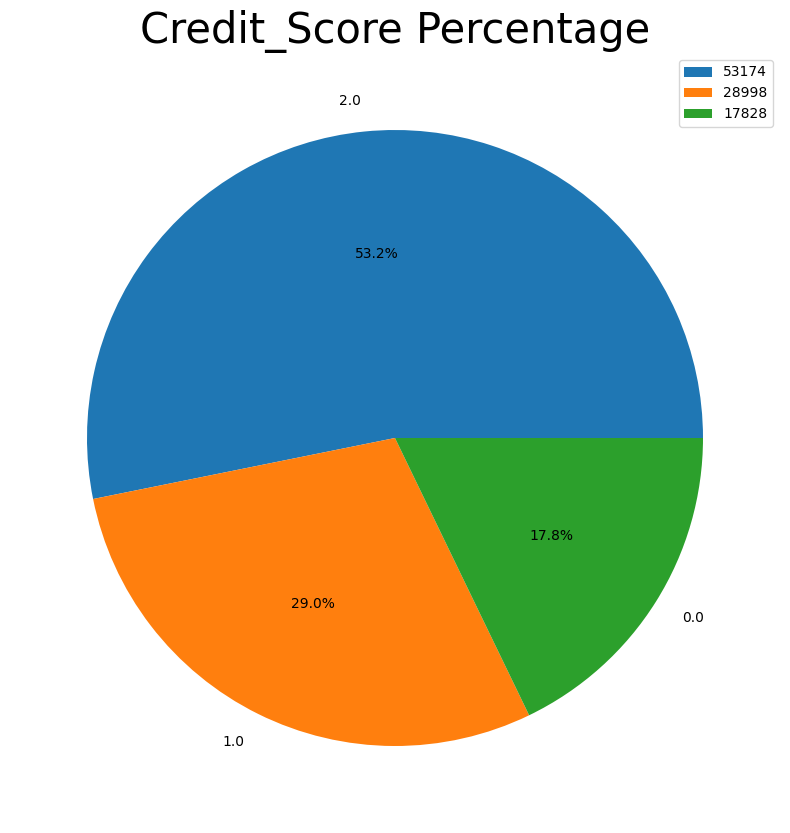

In [147]:
labels = combined_df["credit__score_label"].value_counts().index
sizes = combined_df["credit__score_label"].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(combined_df["credit__score_label"].value_counts())
plt.show()

In [148]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Age                        100000 non-null  float64
 1   Annual_Income              100000 non-null  float64
 2   Delay_from_due_date        100000 non-null  float64
 3   Num_of_Delayed_Payment     92998 non-null   object 
 4   Num_Credit_Inquiries       100000 non-null  float64
 5   Credit_Mix                 100000 non-null  float64
 6   Outstanding_Debt           100000 non-null  float64
 7   Total_EMI_per_month        100000 non-null  float64
 8   Payment_Behaviour          100000 non-null  float64
 9   Credit_Age_years           100000 non-null  float64
 10  Payment_of_Min_Amount_NM   100000 non-null  float64
 11  Payment_of_Min_Amount_No   100000 non-null  float64
 12  Payment_of_Min_Amount_Yes  100000 non-null  float64
 13  credit__score_label        100

In [149]:
x_train , x_test , y_train , y_test =train_test_split(x,y,test_size=0.2,random_state=42)

In [151]:
x_train_imputed = imputer.fit_transform(x_train)
sm = SMOTE(k_neighbors=7)
x_train_sm, y_train_sm = sm.fit_resample(x_train_imputed, y_train)

In [152]:
data_after_smote = pd.DataFrame(x_train_sm, columns=x_train.columns)
data_after_smote['target'] = y_train_sm 
data_after_smote['target']

0         2.0
1         0.0
2         0.0
3         2.0
4         0.0
         ... 
127720    1.0
127721    1.0
127722    1.0
127723    1.0
127724    1.0
Name: target, Length: 127725, dtype: float64

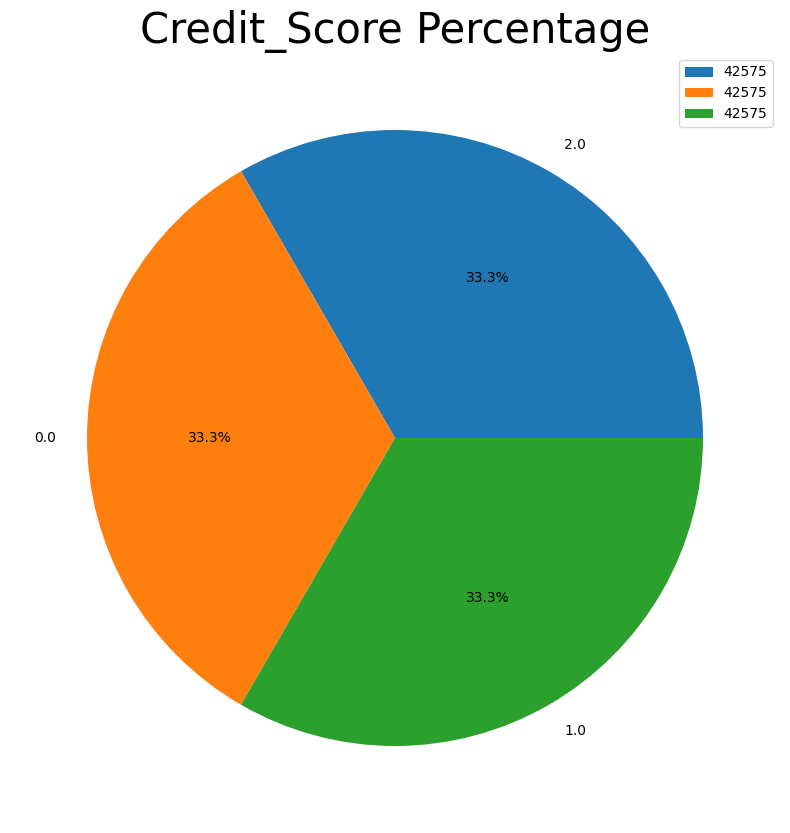

In [153]:
labels = data_after_smote['target'].value_counts().index
sizes = data_after_smote['target'].value_counts()

plt.figure(figsize = (10,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 30)
plt.legend(data_after_smote['target'].value_counts())
plt.show()

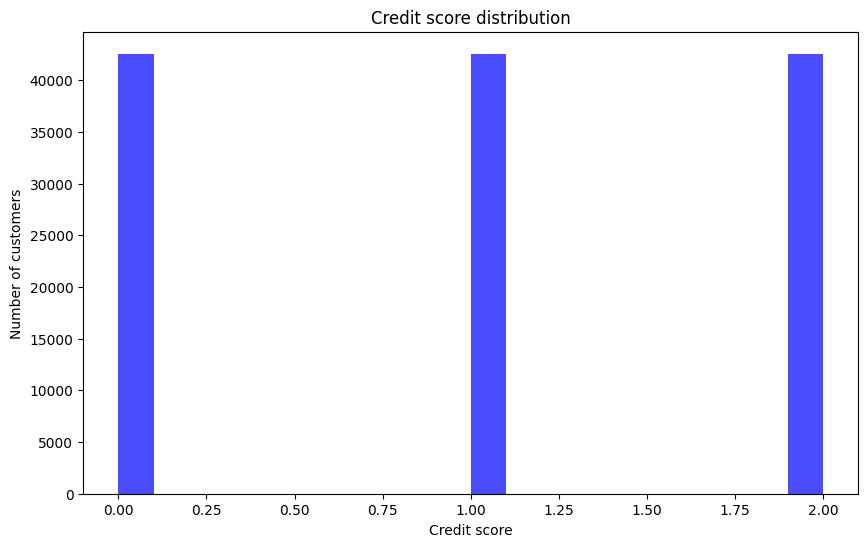

In [154]:
plt.figure(figsize=(10, 6))
plt.hist(data_after_smote['target'], bins=20, color='blue', alpha=0.7)
plt.title('Credit score distribution')
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.show()

In [155]:
X= data_after_smote.drop(['target'],axis=1)
Y=data_after_smote['target']


In [156]:
x_train , x_test , y_train , y_test =train_test_split(X,Y,test_size=0.2,random_state=42)

In [157]:
def logistic():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    return model


def knn():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=7)
    model.fit(x_train, y_train)
    return model


def naive_bayes():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train, y_train)
    return model


def decisionTree():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=500)
    model.fit(x_train, y_train)
    return model


def randomForest():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=500)
    model.fit(x_train, y_train)
    return model

def svm():
    from sklearn.svm import SVC
    model = SVC(C=2, kernel='rbf')
    model.fit(x_train, y_train)
    return model

def catboost():
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(verbose=False)
    model.fit(x_train, y_train)
    return model


def xgboost():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    return model

In [158]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_test(model):
    y_true = y_test
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred,average="macro")
    recall = recall_score(y_true, y_pred,average="macro")
    f1 = f1_score(y_true, y_pred,average="macro")

    return accuracy, precision, recall, f1

In [160]:
%pip install catboost

model_functions = [
    {"name": "Logistic Regression", "function": logistic},
    {"name": "K Nearest Neighbour", "function": knn},
    {"name": "Naive Bayes", "function": naive_bayes},
    {"name": "Decision Tree", "function": decisionTree},
    {"name": "Random Forest", "function": randomForest},
    {"name": "SVM", "function": svm},
    {"name": "CatBoost", "function": catboost},
    {"name": "XGBoost", "function": xgboost}
]
model_evaluation_report = []
for model_info in model_functions:
    model = model_info["function"]()
    metrics_test = evaluate_model_test(model)
    model_evaluation_report.append({
        "name": model_info["name"],
        "accuracy": metrics_test[0],
        "precision": metrics_test[1],
        "recall": metrics_test[2],
        "f1": metrics_test[3]
    })
df_result = pd.DataFrame(model_evaluation_report)
df_result

   ---------------------------------------- 0.0/101.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/101.8 MB ? eta -:--:--
   ---------------------------------------- 0.5/101.8 MB 1.7 MB/s eta 0:01:01
   ---------------------------------------- 0.8/101.8 MB 1.6 MB/s eta 0:01:04
   ---------------------------------------- 1.0/101.8 MB 1.5 MB/s eta 0:01:09
    --------------------------------------- 1.3/101.8 MB 1.3 MB/s eta 0:01:17
    --------------------------------------- 1.6/101.8 MB 1.3 MB/s eta 0:01:19
    --------------------------------------- 1.6/101.8 MB 1.3 MB/s eta 0:01:19
    --------------------------------------- 1.8/101.8 MB 1.2 MB/s eta 0:01:25
    --------------------------------------- 2.1/101.8 MB 1.2 MB/s eta 0:01:24
    --------------------------------------- 2.4/101.8 MB 1.1 MB/s eta 0:01:27
   - -------------------------------------- 2.6/101.8 MB 1.1 MB/s eta 0:01:27
   - -------------------------------------- 2.9/101.8 MB 1.1 MB/s eta 0:01:28


,name,accuracy,precision,recall,f1
0,Logistic Regression,0.640595,0.641692,0.641892,0.632966
1,K Nearest Neighbour,0.733451,0.735633,0.734897,0.724850
2,Naive Bayes,0.640908,0.647652,0.642857,0.622232
3,Decision Tree,0.745821,0.745923,0.746150,0.746030
4,Random Forest,0.831200,0.831214,0.831811,0.830133
5,SVM,0.702642,0.705425,0.703822,0.697019
6,CatBoost,0.786768,0.787970,0.787482,0.784971
7,XGBoost,0.791388,0.792246,0.792094,0.789674


In [161]:
import pickle
random_forest_model = model_functions[4]["function"]()
random_forest_model.fit(x_train, y_train)
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

In [162]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [163]:
import numpy as np
from sklearn.metrics import classification_report
num_classes = y_train.nunique()

model = Sequential()
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=num_classes, activation='softmax'))  
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(
    x=x_train,
    y=y_train,  
    epochs=10,
    validation_data=(x_test, y_test),  
    verbose=1,
    callbacks=[early_stop]
)


Epoch 1/10
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 1.0273 - val_loss: 0.8257
Epoch 2/10
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8768 - val_loss: 0.7951
Epoch 3/10
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8479 - val_loss: 0.7798
Epoch 4/10
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8405 - val_loss: 0.7762
Epoch 5/10
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8357 - val_loss: 0.7735
Epoch 6/10
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8314 - val_loss: 0.7711
Epoch 7/10
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8310 - val_loss: 0.7686
Epoch 8/10
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8288 - val_loss: 0.7682
Epoch 9/10
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8298 - val_loss: 0.7674
Epoch 10/10
3194/3194 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.8269 - val_loss: 0.7653


In [164]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
print(classification_report(y_test, predicted_classes))


799/799 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

         0.0       0.67      0.83      0.74      8443
         1.0       0.71      0.77      0.74      8480
         2.0       0.70      0.48      0.57      8622

    accuracy                           0.69     25545
   macro avg       0.69      0.69      0.68     25545
weighted avg       0.69      0.69      0.68     25545

